In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt_1
%matplotlib inline
import glob
import os
from py_vollib.black_scholes.implied_volatility import implied_volatility 


os.chdir(r'C:\Users\s0837263\Desktop\Plots_Robust_SDEs\write_up_plots_bimonthly\2D_Robust_SDE_Fit_LSV')

In [117]:
def get_vanilla_iv(files):
    
    

    maturities = range(16,97,16)
   # maturities=[8,16,24,32,40,48]
    strikes_call = np.arange(0.8,1.21, 0.02)
   # strikes_call = strikes_call
    

    for idx_mat in range(0,len(maturities),1):
        fig, ax = plt.subplots(1,2)
        fig_1, ax_1 = plt_1.subplots(1,2)
        set_label_lb_1=0
        set_label_unc_1=0
        set_label_ub_1=0
        set_label_lb=0
        set_label_unc=0
        set_label_ub=0
        for filename in files:
       # print('idx',idx)
            print('filename',filename)
            checkpoint = torch.load(filename, map_location="cpu")
          #  vanilla_pred = checkpoint["pred"]
          #  print('vanilla_pred', vanilla_pred)
            vanilla_pred = checkpoint["pred"].reshape(6,21).numpy()
            vanilla_target = checkpoint["target_mat_T"].reshape(6,21).numpy()
            K = strikes_call#.reshape(1,21) #np.load('SPX_strikes.npy')[:45]/1000
            iv = np.zeros_like(K)
            iv_target = np.zeros_like(K)
            t=maturities[idx_mat]
            format_st = "Neural_SDE_maturity_"#+str(t)#filename#.replace("48.pth.tar","")
            for idx, (pred, target, k) in enumerate(zip(vanilla_pred[idx_mat,0:21], vanilla_target[idx_mat,0:21], K)):
                try:
                    iv[idx] = implied_volatility(pred,  S=1, K=k, r=0.025, t=t/96, flag="c")
                except:
                    pass
                try:
                    iv_target[idx] = implied_volatility(target,  S=1, K=k, r=0.025, t=t/96, flag="c")
                except:
                    pass 
            if ("lowerbound" in filename) and ("maturity96" in filename):
                if set_label_lb==0:
                    ax[0].plot(K, vanilla_pred[idx_mat,0:21], label="LSV LB",color='green')
                    ax[0].plot(K, vanilla_target[idx_mat,0:21], label="Target Price",color='black')
                    ax[1].plot(K, (vanilla_pred[idx_mat,0:21]-vanilla_target[idx_mat,0:21])*10000, label="Price Error LB",color='green')
                    set_label_lb=1
                    ax[1].legend()
                  #  ax[0].legend()
                else:
                    ax[0].plot(K, vanilla_pred[idx_mat,0:21],color='green')
                    ax[1].plot(K, np.abs(vanilla_pred[idx_mat,0:21]-vanilla_target[idx_mat,0:21])*10000, color='green')
            elif ("upperbound" in filename) and ("maturity96" in filename):
                if set_label_ub==0:
                    ax[0].plot(K, vanilla_pred[idx_mat,0:21], label="LSV UB",color='blue')
                    ax[1].plot(K, (vanilla_pred[idx_mat,0:21]-vanilla_target[idx_mat,0:45])*10000, label="Price Error UB",color='blue')
                    set_label_ub=1
                 #   ax[1].legend()
                else:
                    ax[0].plot(K, vanilla_pred[idx_mat,0:21],color='blue')
                    ax[1].plot(K, np.abs(vanilla_pred[idx_mat,0:21]-vanilla_target[idx_mat,0:45])*10000, color='blue')
            elif "maturity96" in filename:
                if set_label_unc==0:
                    ax[0].plot(K, vanilla_pred[idx_mat,0:21], label="LSV No Bound",color='red')
                    ax[1].plot(K, (vanilla_pred[idx_mat,0:21]-vanilla_target[idx_mat,0:45])*10000, label="Price Error No Bound",color='red')
                    set_label_unc=1
                 #   ax[1].legend()
                else:
                    ax[0].plot(K, vanilla_pred[idx_mat,0:21],color='red')
                    ax[1].plot(K, np.abs(vanilla_pred[idx_mat,0:21]-vanilla_target[idx_mat,0:21])*10000, color='red')
                    
            ax[0].legend()
            ax[1].legend()
            ax[0].set_ylabel("Call Price")
            ax[0].set_xlabel("K")
            ax[0].set_title("Call Price, "+"T={} Months".format(t//8))
            ax[1].ticklabel_format(axis="y", style="sci")
            ax[1].set_ylabel("Error (bps)")
            ax[1].set_ylim([-50,50])
            ax[1].set_title("Call Price Error")
           # fig.suptitle("Maturity T={} Months".format(t//8))
    
            fig.tight_layout(rect=[0, 0.03, 1, 0.95])
            fig.savefig(format_st+str(t)+'_vanilla.pdf', format='pdf')
           # print(format_st+"_vanilla.pdf")
            
            if "lowerbound" in filename:
                if set_label_lb_1==0:
                    ax_1[0].plot(K, iv, label="LSV LB",color='green')
                    ax_1[1].plot(K, (iv-iv_target)*10000, label="IV Error LB",color='green')
                    ax_1[0].plot(K, iv_target, label="Target IV",color='black')
                    set_label_lb_1=1
                   # ax_1[1].legend()
                else:
                    ax_1[0].plot(K, iv,color='green')
                    ax_1[1].plot(K, (iv-iv_target)*10000, color='green')
            elif "upperbound" in filename:
                if set_label_ub_1==0:
                    ax_1[0].plot(K, iv, label="LSV UB",color='blue')
                    ax_1[1].plot(K, (iv-iv_target)*10000, label="IV Error UB",color='blue')
                    set_label_ub_1=1
                 #   ax_1[1].legend()
                else:
                    ax_1[0].plot(K, iv,color='blue')
                    ax_1[1].plot(K, np.abs(iv-iv_target)*10000, color='blue')
            else:
                if set_label_unc_1==0:
                    ax_1[0].plot(K, iv, label="LSV No Bound",color='red')
                    ax_1[1].plot(K, (iv-iv_target)*10000, label="IV Error No Bound",color='red')
                    set_label_unc_1=1
                 #   ax_1[1].legend()
                else:                   
                    ax_1[0].plot(K, iv,color='red')
                    ax_1[1].plot(K, (iv-iv_target)*10000, color='red')    
                
            
            ax_1[0].legend()
            ax_1[1].legend()
            ax_1[0].set_ylabel("Implied Vol.")
            ax_1[0].set_xlabel("K")
            ax_1[0].set_title("Implied Vol., "+"T={} Months".format(t//8))
            ax_1[1].ticklabel_format(axis="y", style="sci")
            ax_1[1].set_ylim([-200,200])
            ax_1[1].set_ylabel("Error (bps)")
            ax_1[1].set_title("Implied Vol. Error")
       # fig.suptitle("Maturity T={} Months".format(t//8))
        #fig.suptitle("Vanilla Prices fit")
            fig_1.tight_layout(rect=[0, 0.03, 1, 0.95])
            fig_1.savefig(format_st+str(t)+'_iv.pdf', format='pdf')
        #print(format_st+"_iv.pdf")

# Neural SLV SDE fit to constrained calibration (simultaneous to all maturities)

In [118]:
files = glob.glob("Neural_SDE_*tar")
files = [f for f in files if "96"  in f]
files = [f for f in files if "Augmented"  in f]
files = [f for f in files if "unbiased" not  in f]

In [119]:
files

['Neural_SDE_exp0_lowerbound_maturity96_AugmentedLagrangian.pth.tar',
 'Neural_SDE_exp0_upperbound_maturity96_AugmentedLagrangian.pth.tar',
 'Neural_SDE_exp1_lowerbound_maturity96_AugmentedLagrangian.pth.tar',
 'Neural_SDE_exp1_upperbound_maturity96_AugmentedLagrangian.pth.tar',
 'Neural_SDE_exp2_lowerbound_maturity96_AugmentedLagrangian.pth.tar',
 'Neural_SDE_exp2_upperbound_maturity96_AugmentedLagrangian.pth.tar',
 'Neural_SDE_exp3_lowerbound_maturity96_AugmentedLagrangian.pth.tar',
 'Neural_SDE_exp3_upperbound_maturity96_AugmentedLagrangian.pth.tar',
 'Neural_SDE_exp4_lowerbound_maturity96_AugmentedLagrangian.pth.tar',
 'Neural_SDE_exp4_upperbound_maturity96_AugmentedLagrangian.pth.tar',
 'Neural_SDE_exp5_lowerbound_maturity96_AugmentedLagrangian.pth.tar',
 'Neural_SDE_exp5_upperbound_maturity96_AugmentedLagrangian.pth.tar',
 'Neural_SDE_exp6_lowerbound_maturity96_AugmentedLagrangian.pth.tar',
 'Neural_SDE_exp6_upperbound_maturity96_AugmentedLagrangian.pth.tar',
 'Neural_SDE_exp7_lo

filename Neural_SDE_exp0_lowerbound_maturity96_AugmentedLagrangian.pth.tar
filename Neural_SDE_exp0_upperbound_maturity96_AugmentedLagrangian.pth.tar
filename Neural_SDE_exp1_lowerbound_maturity96_AugmentedLagrangian.pth.tar
filename Neural_SDE_exp1_upperbound_maturity96_AugmentedLagrangian.pth.tar
filename Neural_SDE_exp2_lowerbound_maturity96_AugmentedLagrangian.pth.tar
filename Neural_SDE_exp2_upperbound_maturity96_AugmentedLagrangian.pth.tar
filename Neural_SDE_exp3_lowerbound_maturity96_AugmentedLagrangian.pth.tar
filename Neural_SDE_exp3_upperbound_maturity96_AugmentedLagrangian.pth.tar
filename Neural_SDE_exp4_lowerbound_maturity96_AugmentedLagrangian.pth.tar
filename Neural_SDE_exp4_upperbound_maturity96_AugmentedLagrangian.pth.tar
filename Neural_SDE_exp5_lowerbound_maturity96_AugmentedLagrangian.pth.tar
filename Neural_SDE_exp5_upperbound_maturity96_AugmentedLagrangian.pth.tar
filename Neural_SDE_exp6_lowerbound_maturity96_AugmentedLagrangian.pth.tar
filename Neural_SDE_exp6_

filename Neural_SDE_exp5_lowerbound_maturity96_AugmentedLagrangian.pth.tar
filename Neural_SDE_exp5_upperbound_maturity96_AugmentedLagrangian.pth.tar
filename Neural_SDE_exp6_lowerbound_maturity96_AugmentedLagrangian.pth.tar
filename Neural_SDE_exp6_upperbound_maturity96_AugmentedLagrangian.pth.tar
filename Neural_SDE_exp7_lowerbound_maturity96_AugmentedLagrangian.pth.tar
filename Neural_SDE_exp7_upperbound_maturity96_AugmentedLagrangian.pth.tar
filename Neural_SDE_exp8_lowerbound_maturity96_AugmentedLagrangian.pth.tar
filename Neural_SDE_exp8_upperbound_maturity96_AugmentedLagrangian.pth.tar
filename Neural_SDE_exp9_lowerbound_maturity96_AugmentedLagrangian.pth.tar
filename Neural_SDE_exp9_upperbound_maturity96_AugmentedLagrangian.pth.tar


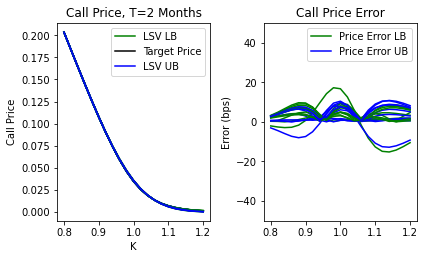

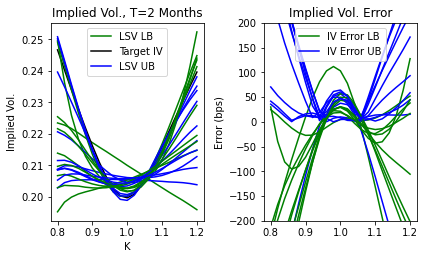

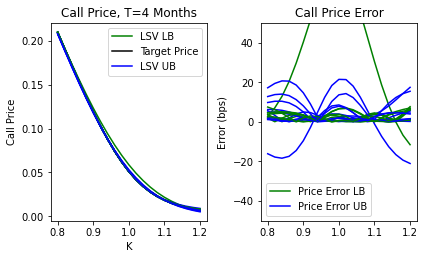

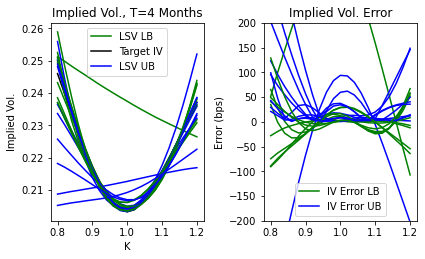

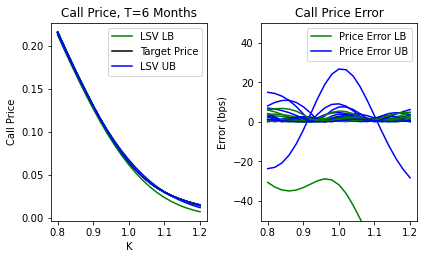

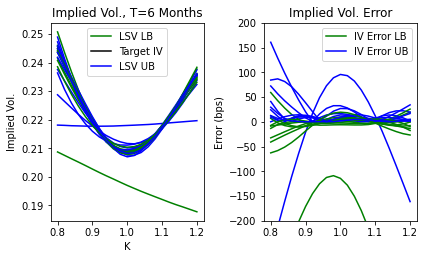

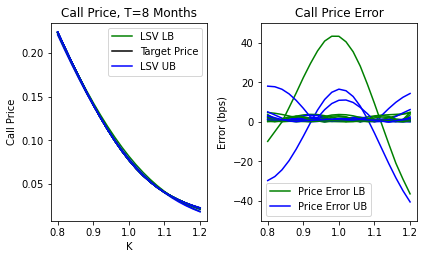

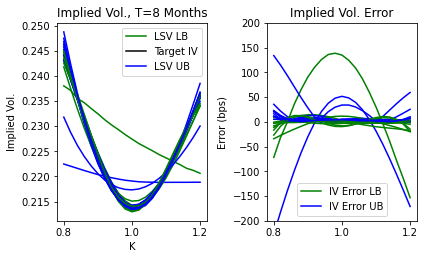

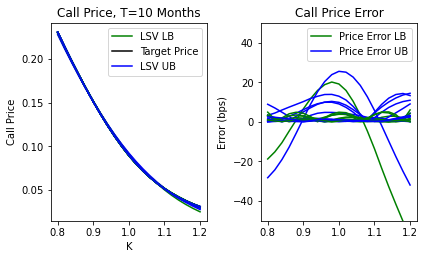

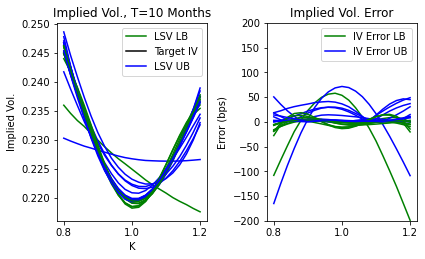

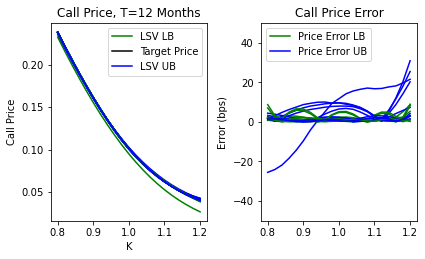

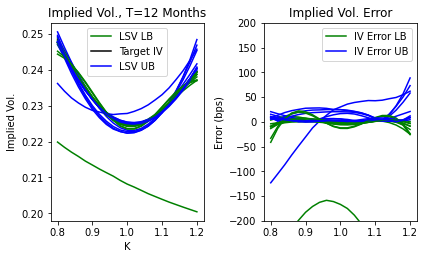

In [120]:
#for filename in files:
get_vanilla_iv(files)


In [ ]:
def get_vanilla_iv(files):
    
    
    maturities = range(16,97,16)
   # maturities=[8,16,24,32,40,48]
    strikes_call = np.arange(0.8,1.21, 0.02)
    strikes_call = strikes_call.reshape(1,len(strikes_call))
    set_label_lb_1=0
    set_label_unc_1=0
    set_label_ub_1=0
    set_label_lb=0
    set_label_unc=0
    set_label_ub=0
   # for idx_mat in range(0,len(maturities),1):
    for T in maturities:
        fig, ax = plt.subplots(1,2)
        fig_1, ax_1 = plt_1.subplots(1,2)
        for filename in files:
            
       # print('idx',idx)
            checkpoint = torch.load(filename, map_location="cpu")
            t = checkpoint["T"]
            if T == t:
                vanilla_pred = checkpoint["pred"]
                print(vanilla_pred)
                vanilla_pred = checkpoint["pred"].reshape(1,21).numpy()
                vanilla_target = checkpoint["target_mat_T"].reshape(1,21).numpy()
                K = strikes_call #np.load('SPX_strikes.npy')[:45]/1000
                iv = np.zeros_like(K)
                iv_target = np.zeros_like(K)
                format_st = "Neural_SDE_maturity_"#+str(t)#filename#.replace("48.pth.tar","")
                for idx, (pred, target, k) in enumerate(zip(vanilla_pred, vanilla_target, K)):
                    try:
                        iv[idx] = implied_volatility(pred,  S=1, K=k, r=0.025, t=t/96, flag="c")
                    except:
                        pass
                    try:
                        iv_target[idx] = implied_volatility(target,  S=1, K=k, r=0.025, t=t/96, flag="c")
                    except:
                        pass
                print('iv',iv)
                print('iv_target',iv_target)
                if "lowerbound" in filename:
                    if set_label_lb==0:
                        ax[0].plot(K, vanilla_pred, label="LV LB",color='green')
                        ax[1].plot(K, np.abs(vanilla_pred-vanilla_target)*10000, label="Price Error LB",color='green')
                        set_label_lb=1
                      #  ax[1].legend()
                      #  ax[0].legend()
                    else:
                        ax[0].plot(K, vanilla_pred,color='green')
                        ax[1].plot(K, np.abs(vanilla_pred-vanilla_target)*10000, color='green')
                elif "upperbound" in filename:
                    if set_label_ub==0:
                        ax[0].plot(K, vanilla_pred, label="LV UB",color='blue')
                        ax[1].plot(K, np.abs(vanilla_pred-vanilla_target)*10000, label="Price Error UB",color='blue')
                        set_label_ub=1
                       # ax[1].legend()
                    else:
                        ax[0].plot(K, vanilla_pred,color='blue')
                        ax[1].plot(K, np.abs(vanilla_pred-vanilla_target)*10000, color='blue')
                else:
                    if set_label_unc==0:
                        ax[0].plot(K, vanilla_pred, label="LV No Bound",color='red')
                        ax[1].plot(K, np.abs(vanilla_pred-vanilla_target)*10000, label="Price Error No Bound",color='red')
                        set_label_unc=1
                        ax[0].plot(K, vanilla_target, label="Target Price",color='black')
                       # ax[1].legend()
                    else:
                        ax[0].plot(K, vanilla_pred,color='red')
                        ax[1].plot(K, np.abs(vanilla_pred-vanilla_target)*10000, color='red')
                    
               # ax[0].legend()
               # ax[1].legend()
                ax[0].set_ylabel("Call Price")
                ax[0].set_xlabel("K")
                ax[0].set_title("Call Price, "+"T={} Months".format(t//8))
                ax[1].ticklabel_format(axis="y", style="sci")
                ax[1].set_ylabel("Error (bps)")
                ax[1].set_ylim([0,200])
                ax[1].set_title("Call Price Error")
               # fig.suptitle("Maturity T={} Months".format(t//8))
    
                fig.tight_layout(rect=[0, 0.03, 1, 0.95])
                fig.savefig(format_st+str(t)+'_vanilla.pdf', format='pdf')
               # print(format_st+"_vanilla.pdf")
            
                if "lowerbound" in filename:
                    if set_label_lb_1==0:
                        ax_1[0].plot(K, iv, label="LV LB",color='green')
                        ax_1[1].plot(K, np.abs(iv-iv_target)*10000, label="IV Error LB",color='green')
                        set_label_lb_1=1
                        # ax_1[1].legend()
                else:
                    ax_1[0].plot(K, iv,color='green')
                    ax_1[1].plot(K, np.abs(iv-iv_target)*10000, color='green')
            elif "upperbound" in filename:
                if set_label_ub_1==0:
                    ax_1[0].plot(K, iv, label="LV UB",color='blue')
                    ax_1[1].plot(K, np.abs(iv-iv_target)*10000, label="IV Error UB",color='blue')
                    set_label_ub_1=1
                 #   ax_1[1].legend()
                else:
                    ax_1[0].plot(K, iv,color='blue')
                    ax_1[1].plot(K, np.abs(iv-iv_target)*10000, color='blue')
            else:
                if set_label_unc_1==0:
                    ax_1[0].plot(K, iv, label="LV No Bound",color='red')
                    ax_1[1].plot(K, np.abs(iv-iv_target)*10000, label="IV Error No Bound",color='red')
                    set_label_unc_1=1
                    ax_1[0].plot(K, iv_target, label="Target IV",color='black')
                 #   ax_1[1].legend()
                else:                   
                    ax_1[0].plot(K, iv,color='red')
                    ax_1[1].plot(K, np.abs(iv-iv_target)*10000, color='red')    
                
            
              #  ax_1[0].legend()
              #  ax_1[1].legend()
                ax_1[0].set_ylabel("Implied Vol.")
                ax_1[0].set_xlabel("K")
                ax_1[0].set_title("Implied Vol., "+"T={} Months".format(t//8))
                ax_1[1].ticklabel_format(axis="y", style="sci")
                ax_1[1].set_ylim([0,750])
                ax_1[1].set_ylabel("Error (bps)")
                ax_1[1].set_title("Implied Vol. Error")
           # fig.suptitle("Maturity T={} Months".format(t//8))
            #fig.suptitle("Vanilla Prices fit")
                fig_1.tight_layout(rect=[0, 0.03, 1, 0.95])
                fig_1.savefig(format_st+str(t)+'_iv.pdf', format='pdf')
        #print(format_st+"_iv.pdf")
    